In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

import numpy as np
import pandas as pd

import mlgrad.af as af
import mlgrad.cluster as cluster
import mlgrad.funcs as funcs

from mlgrad.cluster import KMeans, KMeansMahalanobis, RKMeans
import mlgrad.af as af


(200, 2) (100, 2)


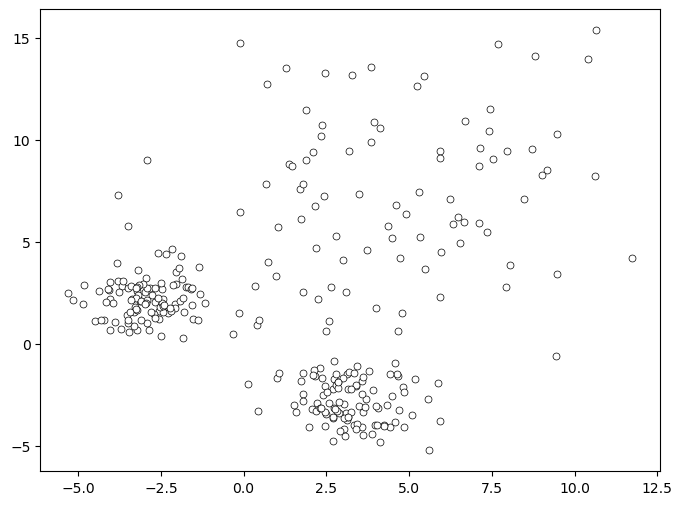

In [2]:
S=10.
X_1, _ = make_blobs(n_samples=200, n_features=2, 
                    centers=[(-30,20), (30,-30)], 
                    cluster_std=[10.0, 10.0])

X_2, _ = make_blobs(n_samples=100, n_features=2, 
                    centers=[(10,40),(50, 90)], 
                    cluster_std=[30., 30.])

print(X_1.shape, X_2.shape)
X = np.vstack([X_1, X_2])
X /= S

plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], s=25, c='w', edgecolors='k', linewidth=0.5)
plt.show()


In [3]:
def get_range(a, q=20):
    amin, amax = min(a), max(a)
    h = (amax - amin) / q
    return amin - h, amax + h

xmin, xmax = get_range(X[:,0])
ymin, ymax = get_range(X[:,1])
XX, YY = np.meshgrid(
            np.linspace(xmin, xmax, 100), 
            np.linspace(ymin, ymax, 100))
XY = np.c_[(XX.ravel(), YY.ravel())]

In [4]:
km = KMeans(2)
km.fit(X)

In [5]:
Yp = km.predict(X)

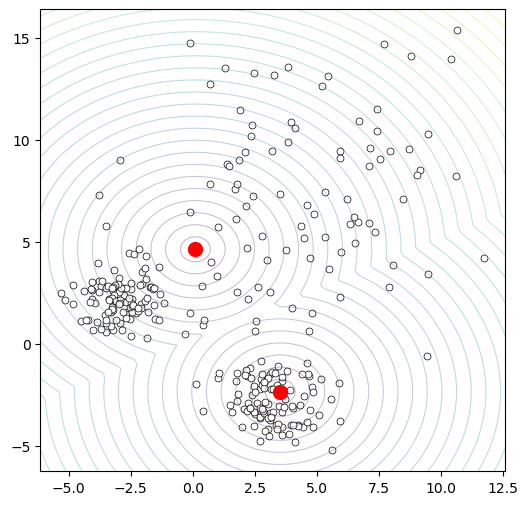

In [6]:
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], s=25, c='w', edgecolors='k', linewidth=0.5)
plt.scatter(km.c[:,0], km.c[:,1], c='r', s=100)

Z = np.fromiter((km.dist(xy) for xy in XY), 'd', len(XY))
ZZ = Z.reshape(XX.shape)
plt.contour(ZZ, levels=np.linspace(Z.min(), Z.max(), 30), extent=(xmin,xmax,ymin,ymax), linewidths=0.75, alpha=0.3)

plt.show()

In [24]:
wma = af.averaging_function("WM", funcs.Quantile_Sqrt(0.66, 0.01))
rkm = cluster.RKMeans(2, wma)
rkm.fit(X)

In [25]:
Y2p = rkm.predict(X)

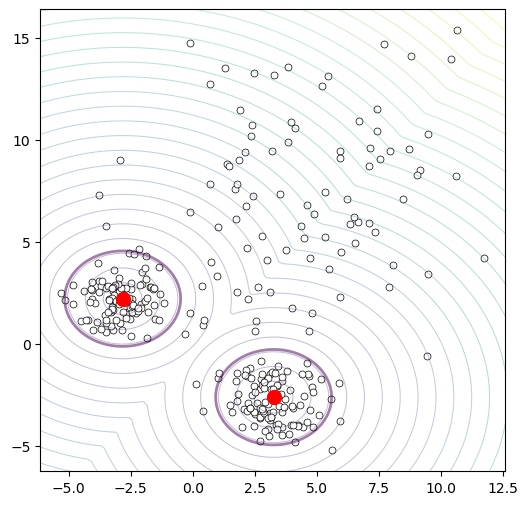

In [28]:
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], s=25, c='w', edgecolors='k', linewidth=0.5)
plt.scatter(rkm.c[:,0], rkm.c[:,1], c='r', s=100)

Z = np.fromiter((rkm.dist(xy) for xy in XY), 'd', len(XY))
ZZ = Z.reshape(XX.shape)
plt.contour(ZZ, levels=np.linspace(Z.min(), Z.max(), 30), extent=(xmin,xmax,ymin,ymax), linewidths=0.75, alpha=0.3)

zz = np.quantile(np.fromiter((rkm.dist(x) for x in X), 'd', len(X)), 0.66)
plt.contour(ZZ, levels=[zz], extent=(xmin,xmax,ymin,ymax), linewidths=2, alpha=0.5)

plt.show()

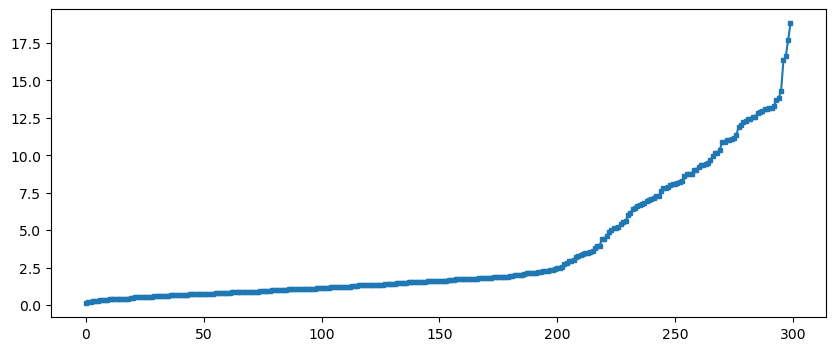

In [29]:
plt.figure(figsize=(10,4))
plt.plot(sorted((rkm.dist(x) for x in X)), marker='s', markersize=3)
plt.show()